**Preparing the Data:**

In [2]:
#For google drive users uncomment the below code
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
# file_path = '/content/drive/My Drive/Data analyst Data.csv' #for drive
file_path = 'Data analyst Data.csv'
df = pd.read_csv(file_path)

In [2]:
column_names = df.columns
print("Column Names:")
for column_name in column_names:
    print(column_name)

Column Names:
First Name
Email ID
Quantity
Events
Attendee Status
College Name
How did you come to know about this event?
Specify in "Others" (how did you come to know about this event)
Designation
Year of Graduation
City
CGPA
Experience with python (Months)
Family Income
Expected salary (Lac)
Leadership- skills


In [3]:
# Imports
import re
import matplotlib.pyplot as plt
import seaborn as sns

**The Basic Questions:**

In [4]:
#Q1. How many unique students are included in the dataset?
unique_students = df['First Name'].nunique()
print("Number of unique students:", unique_students)


Number of unique students: 2324


In [5]:
#Q2. What is the average GPA of the students?
average_gpa = df['CGPA'].mean()
print("Average GPA of students:", average_gpa)

Average GPA of students: 8.038475684511647


In [6]:
#Q3. What is the distribution of students across different graduation years?
graduation_year_distribution = df['Year of Graduation'].value_counts()
print("Distribution of students by graduation year:")
print(graduation_year_distribution)

Distribution of students by graduation year:
2023    1536
2024    1511
2025    1292
2026     555
Name: Year of Graduation, dtype: int64


In [7]:
#Q4. What is the distribution of students' experience with Python programming?
python_experience_distribution = df['Experience with python (Months)'].value_counts()
print("Distribution of students by Python programming experience:")
print(python_experience_distribution)

Distribution of students by Python programming experience:
5    1242
3    1008
8     800
6     738
7     640
4     466
Name: Experience with python (Months), dtype: int64


In [8]:
#Q5. What is the average family income of students?
def extract_income(value):
    income_values = [int(val) for val in re.findall(r'\d+', value)]
    return income_values[0] if 'Lakh+' in value else sum(income_values) / len(income_values)

df['Family Income'] = df['Family Income'].apply(extract_income)
average_family_income = df['Family Income'].mean()
print("Average family income of students:", average_family_income, "Lakh")

Average family income of students: 1.2930118512464241 Lakh


In [9]:
#Q6. How does the GPA vary among different colleges? (Top 5 results)
gpa_by_college = df.groupby('College Name')['CGPA'].mean().sort_values(ascending=False)
print("Colleges with the highest average GPA:")
print(gpa_by_college.head(5))

Colleges with the highest average GPA:
College Name
THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVELOPMENT & RESEARCH - [TIMSCDR]    8.585714
St Xavier's College                                                                  8.578571
B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan                 8.456410
Symbiosis Institute of Technology, Pune                                              8.303448
AP SHAH INSTITUTE OF TECHNOLOGY                                                      8.283333
Name: CGPA, dtype: float64


Outliers detected in 'Quantity' data: False
Outliers detected in 'Attending Status' data: False

Transformation: 'Attending' represented as 1, 'NAN' represented as 0



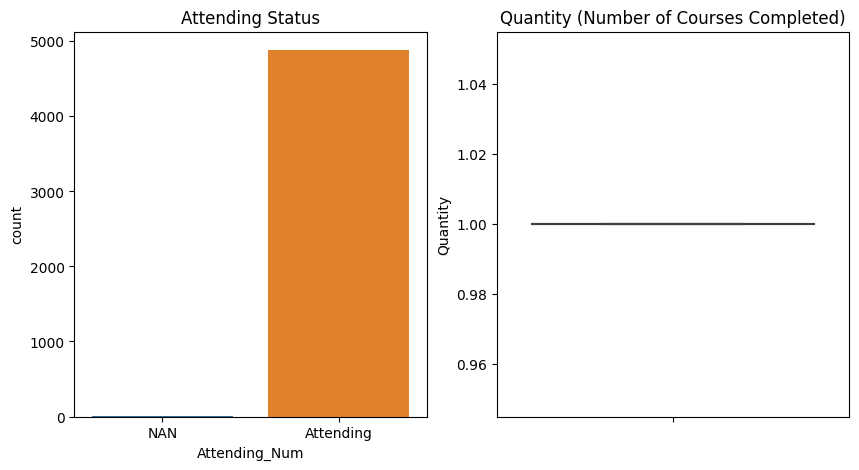

In [10]:
#Q7. Are there any outliers in the attending status and quantity (number of courses completed) attributes?
df['Attending_Num'] = df['Attendee Status'].map({'Attending': 1, 'NAN': 0})

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Attending_Num')
plt.title('Attending Status')
plt.xticks([0, 1], ['NAN', 'Attending'])

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Quantity')
plt.title('Quantity (Number of Courses Completed)')

outliers_detected_quantity = any(df['Quantity'] < 0.96) or any(df['Quantity'] > 1.04)
outliers_detected_attending = any(df['Attending_Num'] < 0) or any(df['Attending_Num'] > 1)

print("Outliers detected in 'Quantity' data:", outliers_detected_quantity)
print("Outliers detected in 'Attending Status' data:", outliers_detected_attending)
print("\nTransformation: 'Attending' represented as 1, 'NAN' represented as 0\n")

plt.show()


In [11]:
#Q8. What is the average GPA for each student from each city?
average_gpa_by_city = df.groupby('City')['CGPA'].mean().reset_index()
print("Average GPA for each city:")
print(average_gpa_by_city)

Average GPA for each city:
          City      CGPA
0     Agartala  7.660714
1         Agra  8.046429
2    Ahemdabad  8.190385
3        Ajmer  8.284314
4        Akola  8.021429
..         ...       ...
172    Vidisha  7.738095
173  Vijaywada  7.986364
174     Wardha  8.328571
175     konark  8.071429
176      kullu  7.878571

[177 rows x 2 columns]


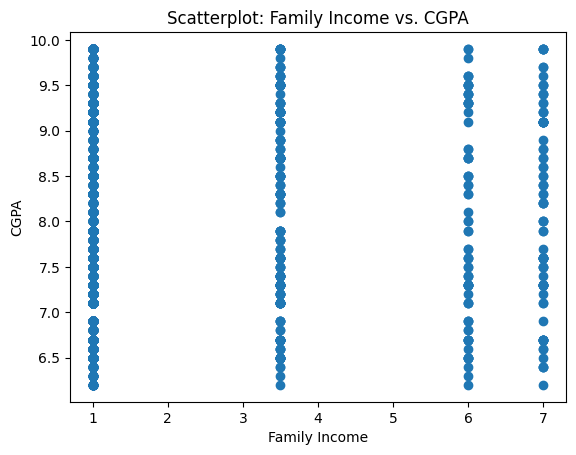


Correlation Coefficient between Family Income and CGPA: 0.015311266885362952

Weak positive linear relationship is shown, No relationship between Family Income and CGPA


In [12]:
#Q9. Can we identify a relationship between family income and GPA?
plt.scatter(df['Family Income'], df['CGPA'])
plt.xlabel('Family Income')
plt.ylabel('CGPA')
plt.title('Scatterplot: Family Income vs. CGPA')
plt.show()

correlation_coefficient = df['Family Income'].corr(df['CGPA'])
print("\nCorrelation Coefficient between Family Income and CGPA:", correlation_coefficient)
print("\nWeak positive linear relationship is shown, No relationship between Family Income and CGPA")

**The Moderate Questions:**

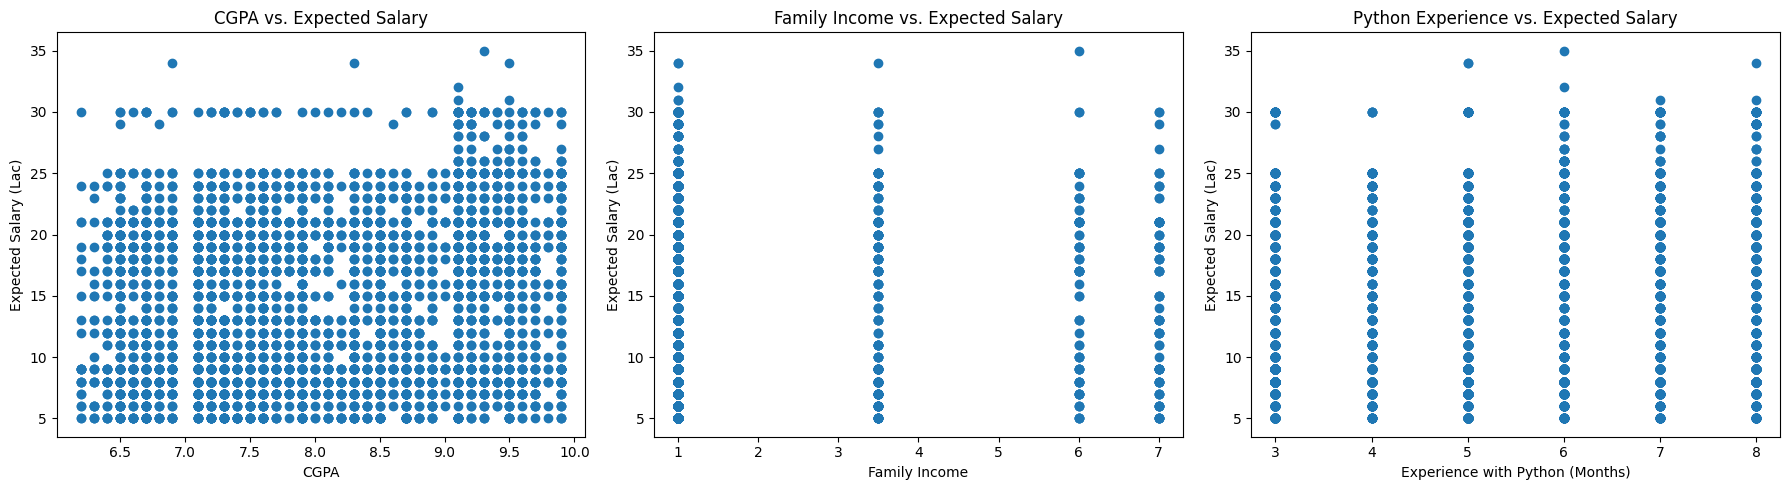

In [13]:
#Q1. How does the expected salary vary based on factors like 'CGPA', 'Family Income', 'Experience with Python'?
plt.figure(figsize=(18, 5))

plt.subplot(131)
plt.scatter(df['CGPA'], df['Expected salary (Lac)'])
plt.xlabel('CGPA')
plt.ylabel('Expected Salary (Lac)')
plt.title('CGPA vs. Expected Salary')

plt.subplot(132)
plt.scatter(df['Family Income'], df['Expected salary (Lac)'])
plt.xlabel('Family Income')
plt.ylabel('Expected Salary (Lac)')
plt.title('Family Income vs. Expected Salary')

plt.subplot(133)
plt.scatter(df['Experience with python (Months)'], df['Expected salary (Lac)'])
plt.xlabel('Experience with Python (Months)')
plt.ylabel('Expected Salary (Lac)')
plt.title('Python Experience vs. Expected Salary')

plt.tight_layout()
plt.show()

In [14]:
#Q2. Which event tends to attract more students from specific fields of study?
event_counts_by_field = df.groupby('Events')['College Name'].value_counts().unstack().fillna(0)
most_popular_events = event_counts_by_field.idxmax()
print("Most popular events by college:")
print(most_popular_events)

Most popular events by college:
College Name
A. C. Patil College of Engineering                                                                    Art of Resume Building
ADHIYAMAAN COLLEGE OF ENGINEERING                                                    Internship Program(IP) Success Conclave
AP SHAH INSTITUTE OF TECHNOLOGY                                                                       Art of Resume Building
B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan                                  Art of Resume Building
CHHATTISGARH SWAMI VIVEKANANDA TECHNICAL UNIVERSITY TEACHING DEPARTMENT BHILAI       Internship Program(IP) Success Conclave
D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKURDI PUNE                                                 Art of Resume Building
DKTE Society's Textile And Engineering Institute Ichalkaranji                                         Art of Resume Building
Don Bosco College of Engineering Fatorda Goa                                    

In [15]:
#Q3. Do students in leadership positions during their college years tend to have higher CGPA or better expected salary?
mean_cgpa_leadership = df['CGPA'].mean()
mean_salary_leadership = df['Expected salary (Lac)'].mean()

print("Average CGPA for Students in Leadership Positions:", df['CGPA'].mean())
print("Average Expected Salary for Students in Leadership Positions:", df['Expected salary (Lac)'].mean())

if mean_cgpa_leadership > mean_salary_leadership:
    print("\nStudents in leadership positions tend to have a higher CGPA.")
elif mean_cgpa_leadership < mean_salary_leadership:
    print("\nStudents in leadership positions tend to have a better expected salary.")
else:
    print("\nStudents in leadership positions have a similar average CGPA and expected salary.")

Average CGPA for Students in Leadership Positions: 8.038475684511647
Average Expected Salary for Students in Leadership Positions: 13.935635472006538

Students in leadership positions tend to have a better expected salary.


In [16]:
#Q4. Is there a correlation between leadership skills and expected salary of the students?
temp_series = df['Leadership- skills'].map({'yes': 1, 'no': 0})
correlation = temp_series.corr(df['Expected salary (Lac)'])

if correlation > 0:
    result = "There is a positive correlation"
elif correlation < 0:
    result = "There is a negative correlation"
else:
    result = "There is no correlation"

print("Correlation between Leadership- skills and Expected salary (Lac):", correlation)
print("Conclusion:", result)

Correlation between Leadership- skills and Expected salary (Lac): 0.013367103770824451
Conclusion: There is a positive correlation


In [17]:
#Q5. How many students are graduating by the end of 2024?
students_graduating_2024 = len(df[df['Year of Graduation'] == 2024])
print("Number of students graduating by the end of 2024:", students_graduating_2024)

Number of students graduating by the end of 2024: 1511


In [18]:
#Q6. Which promotion channel brings in more student participations for the event?
promotion_counts = df['How did you come to know about this event?'].value_counts()
most_popular_promotion_channel = promotion_counts.idxmax()
print("Most popular promotion channel:", most_popular_promotion_channel)

Most popular promotion channel: Whatsapp


In [19]:
#Q7. Find the total number of students who attend events related to data science (from all data science related courses).
data_science_courses = [
    'Data Visualization using Power BI',
    'Artificial Intelligence',
    'Hello ML and DL',
    'IS DATA SCIENCE FOR YOU?',
    'KYC - Know Your CCPC',
    'RPA: A Boon or A Bane'
]
data_science_students = df[df['Events'].isin(data_science_courses)]
total_data_science_students = len(data_science_students)
print("Total number of students attending Data Science events:", total_data_science_students)


Total number of students attending Data Science events: 1467


In [20]:
#Q8. Do students with high CGPA and more experience in python have higher expectations for salary (avg)?
high_cgpa_experience = df[(df['CGPA'] > 8.038) & (df['Experience with python (Months)'] > 5.39)]
average_salary = high_cgpa_experience['Expected salary (Lac)'].mean()
print("Average Expected Salary for high CGPA and python experience students:", average_salary)

Average Expected Salary for high CGPA and python experience students: 16.9203187250996
